In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
class BaseFunc:
    
    xmax = 1.
    xmin = -1.
    ymax = 1.
    ymin = -1.
    
    xdim = 1
    ydim = 1
    
    num_div_plot = 100
    
    is_regression = False
    
    
    def __init__(self, seed=None):        
        # seeding
        self._seed = None
        self._rs = None
        self.seed(seed)
        
    def __str__(self):
        raise NotImplementedError
    
    def __repr__(self):
        return self.__str__()
    
    def __call__(self, xs, *args, **kwargs):
        assert np.all(self.xmin <= xs) & np.all(xs <= self.xmax)
        return self.fbody(xs, *args, **kwargs)
    
    def seed(self, seed=None):
        if seed is None:
            seed = np.random.randint(2 ** 32)
        self._seed = seed
        self._rs = np.random.RandomState(seed)
        
    def fbody(self, xs, *args, **kwargs):
        raise NotImplementedError
    
    @property
    def ytests(self):
        return np.asarray(self.xtests)
    
    def plot(self, ax=None):
        is_ax_given = ax is not None
        if not is_ax_given:
            ax = plt.gca()
        xs, ys = self.calc_grid_testdata()
        if self.xdim == 1:
            [
                ax.plot(xs.flatten(), ys[:, yi], label="y_" + str(yi))
                for yi in range(self.ydim)
            ]
        elif self.xdim == 2:
            [
                ax.scatter(xs[:, 0], xs[:, 1], c=ys[:, yi], label="y_" + str(yi))
                for yi in range(self.ydim)
            ]
        # ax.plot(xs, ys.flatten())
        if is_ax_given:
            return ax
        plt.show()
    
    def sample_traindata(self, num, var=0.05):
        xs, ys = self.sample_testdata(num)
        if self.is_regression:
            ys = ys + self._rs.normal(0, var, size=ys.shape)
            ys = np.clip(ys, self.ymin, self.ymax)
        return xs, ys
    
    def sample_testdata(self, num):
        xs = self._rs.random(size=(num, self.xdim)) * (self.xmax - self.xmin) + self.xmin
        ys = self(xs)
        return xs, ys
        pass
    
    def calc_grid_testdata(self, num_div_plot=None):
        num_div_plot = num_div_plot if num_div_plot is not None else self.num_div_plot
        xelem = [np.linspace(self.xmin, self.xmax, num_div_plot + 1), ] * self.xdim
        xs = np.asarray([xi.flatten() for xi in np.meshgrid(*xelem)]).T
        ys = self(xs)
        return xs, ys

In [97]:
class Tanh(BaseFunc):
    
    is_regression = True
    
    def __init__(self, seed=None):
        super().__init__(seed)
    
    def __str__(self):
        return "tanh(5x)"
    
    def fbody(self, xs, *args, **kwargs):
        return np.tanh(5 * xs)
    

In [114]:
class Circle(BaseFunc):
    
    xdim = 2
    
    num_div_plot = 50

    is_regression = False

    def __init__(self, r=np.sqrt(2/np.pi), center=(0.0, 0.0), seed=None):
        super().__init__(seed)
        self.r = r
        self.center = np.asarray(center).reshape(1, 2)

    def __str__(self):
        return "Circle(r=2/pi)"

    def fbody(self, xs, *args, **kwargs):
        rs = np.linalg.norm(xs - self.center, axis=1)
        ys = np.ones((xs.shape[0], 1))
        ys[rs > self.r] = -1
        return ys

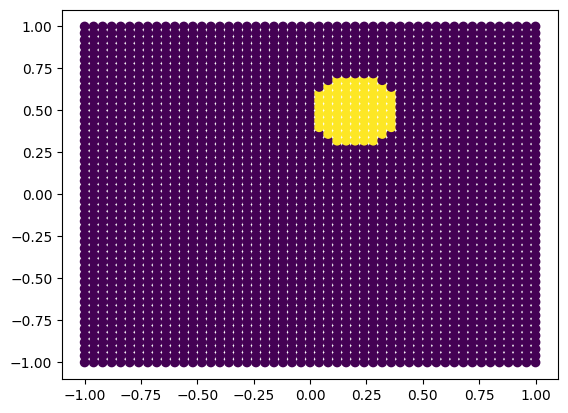

In [116]:
fn = Circle(r=0.2, center=(0.2, 0.5))
fn.plot()

In [117]:
fn = Tanh()

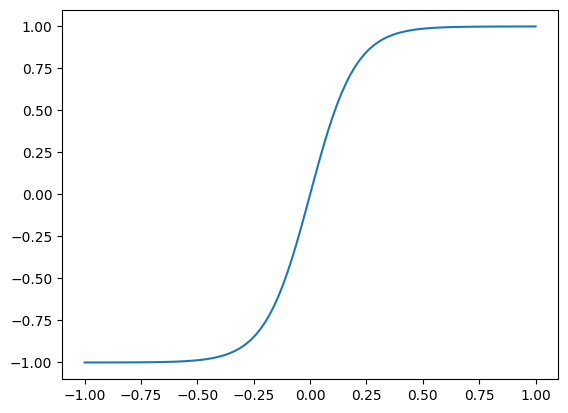

In [101]:
fn.plot()

In [102]:
train_xs, train_ys = fn.sample_traindata(100, var=0.05)

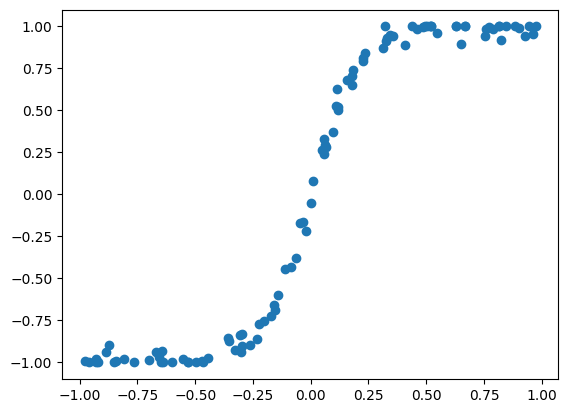

In [103]:
plt.scatter(train_xs.flatten(), train_ys.flatten())